In [1]:
from keras import layers
from keras import models
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [2]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [3]:
train_dir='E:\\wuqiping\\DeepLearning\\PetImages\\trainset'
validation_dir='E:\\wuqiping\\DeepLearning\\PetImages\\validationset'

from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 61s 606ms/step - loss: 0.6915 - acc: 0.5440 - val_loss: 0.6879 - val_acc: 0.6230
Epoch 2/30
100/100 [==============================] - 50s 502ms/step - loss: 0.6587 - acc: 0.5990 - val_loss: 0.6082 - val_acc: 0.6310
Epoch 3/30
100/100 [==============================] - 54s 537ms/step - loss: 0.6174 - acc: 0.6505 - val_loss: 0.5471 - val_acc: 0.6740
Epoch 4/30
100/100 [==============================] - 53s 526ms/step - loss: 0.5683 - acc: 0.7065 - val_loss: 0.5774 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 51s 511ms/step - loss: 0.5289 - acc: 0.7310 - val_loss: 0.5448 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 52s 524ms/step - loss: 0.5060 - acc: 0.7595 - val_loss: 0.6617 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 56s 562ms/step - loss: 0.4842 - acc: 0.7670 - val_loss: 0.5517 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 5

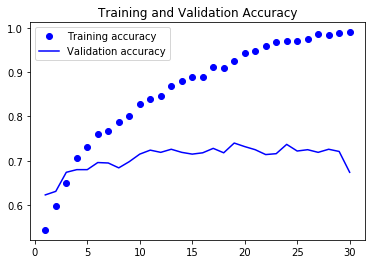

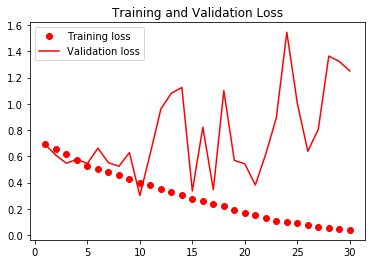

In [8]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()